# Introduction

The work Flow is thus:

Importing Libraries and investigating the data

Data Validation

Data Cleaning

Data Visualization

Conclusion

## Import relevant python libraries

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## Load and read csv files

In [34]:
data = pd.read_csv(r"C:\Users\name\Downloads\capstone.csv")

## DATA VALIDATION

After importing the libraries, we check information about the data set by calling t .head() andhe .info () method:

[ ]


Display the first few rows of the dataset

In [35]:
data.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Obtaining an overview of the dataset

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8790 non-null   object
 1   Type        8790 non-null   object
 2   title       8790 non-null   object
 3   director    8790 non-null   object
 4   Country     8790 non-null   object
 5   date added  8790 non-null   object
 6   rating      8790 non-null   object
 7   duration    8790 non-null   object
 8   listed_in   8790 non-null   object
dtypes: object(9)
memory usage: 618.2+ KB


#### Steps

* change datatype of orderdate and shipdate to datetime

In [37]:
data.columns

Index(['show_id', 'Type', 'title', 'director', 'Country', 'date added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [38]:
# Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')


In [39]:
data.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [40]:
# Fix inconsistent data types and clean up columns
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [12]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   show_id     8790 non-null   object        
 1   type        8790 non-null   object        
 2   title       8790 non-null   object        
 3   director    8790 non-null   object        
 4   country     8790 non-null   object        
 5   date_added  8790 non-null   datetime64[ns]
 6   rating      8790 non-null   object        
 7   duration    8790 non-null   object        
 8   listed_in   8790 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 618.2+ KB


In [41]:
# Extract year and year-month from date_added
data['year_added'] = data['date_added'].dt.year
data['year_month_added'] = data['date_added'].dt.to_period('M')

In [42]:
# Calculate the number of days from release to today
today = pd.to_datetime(datetime.now())
data['days_since_added'] = (today - data['date_added']).dt.days

In [43]:
# Function to separate TV series duration from movie duration
def separate_duration(row):
    if 'Season' in row['duration']:
        return pd.Series([row['duration'], np.nan])
    else:
        return pd.Series([np.nan, row['duration']])

In [44]:
data.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,year_added,year_month_added,days_since_added
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,2021.0,2021-09,993.0
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,NaT,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN,NaT,NaN
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,NaT,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",NaN,NaT,NaN
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",2021.0,2021-09,996.0
4,s8,Movie,sANKOFa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021.0,2021-09,994.0


In [ ]:
data.head()

In [93]:
# Function to create random ratings for each movie
def random_rating():
    return round(np.random.uniform(1, 5), 2)

data['random_rating'] = data.apply(lambda x: random_rating(), axis=1)

In [94]:
# Split listed_in into separate columns and analyze the most popular genre
data['listed_in'] = data['listed_in'].str.split(', ')
data_genres = data.explode('listed_in')

In [95]:
data.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,year_added,year_month_added,days_since_added,tv_series_duration,movie_duration,random_rating
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,[Documentaries],2021.0,2021-09,993.0,NaN,90 min,3.69
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,NaT,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",NaN,NaT,NaN,1 Season,NaN,1.02
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,NaT,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",NaN,NaT,NaN,1 Season,NaN,4.85
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"[Children & Family Movies, Comedies]",2021.0,2021-09,996.0,NaN,91 min,3.55
4,s8,Movie,sANKOFa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...",2021.0,2021-09,994.0,NaN,125 min,2.36


In [96]:
 data_genres.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,year_added,year_month_added,days_since_added,tv_series_duration,movie_duration,random_rating
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,2021.0,2021-09,993.0,NaN,90 min,3.69
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,NaT,TV-MA,1 Season,Crime TV Shows,NaN,NaT,NaN,1 Season,NaN,1.02
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,NaT,TV-MA,1 Season,International TV Shows,NaN,NaT,NaN,1 Season,NaN,1.02
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,NaT,TV-MA,1 Season,TV Action & Adventure,NaN,NaT,NaN,1 Season,NaN,1.02
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,NaT,TV-MA,1 Season,TV Dramas,NaN,NaT,NaN,1 Season,NaN,4.85


# Data Analysis and Visualization

In [97]:
# Most Popular Director
director_counts = data['director'].value_counts().head(10)

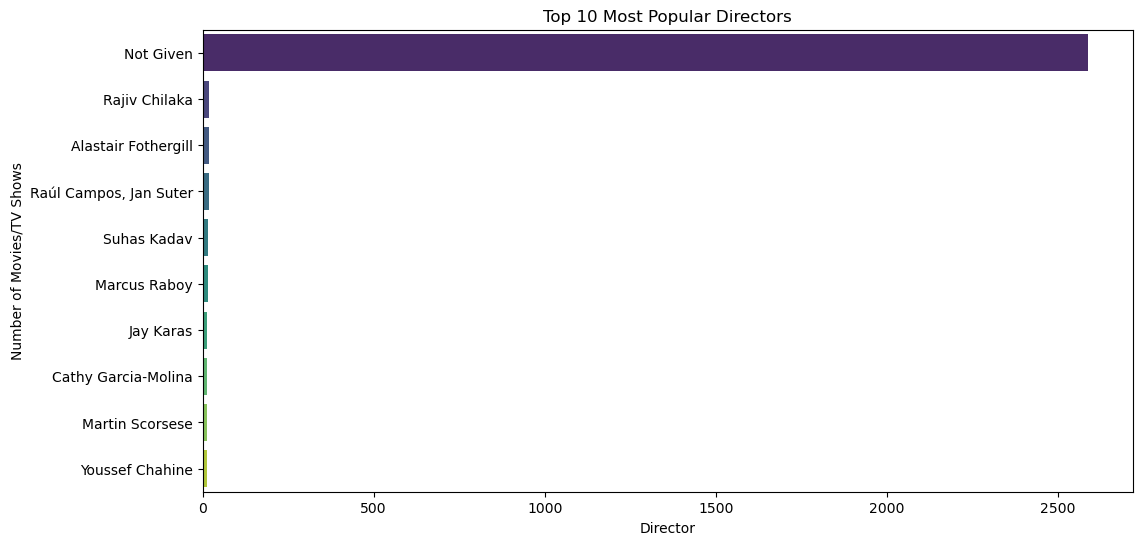

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.show()

In [99]:
# Counting the number of movies/TV shows per country
country_counts = data['country'].value_counts()

### 1. Top 5 countries and bottom 5 countries

In [100]:
# Top 5 countries
top_5_countries = country_counts.head(5)
# Bottom 5 countries (excluding countries with only one movie/TV show)
bottom_5_countries = country_counts[country_counts > 1].tail(5)

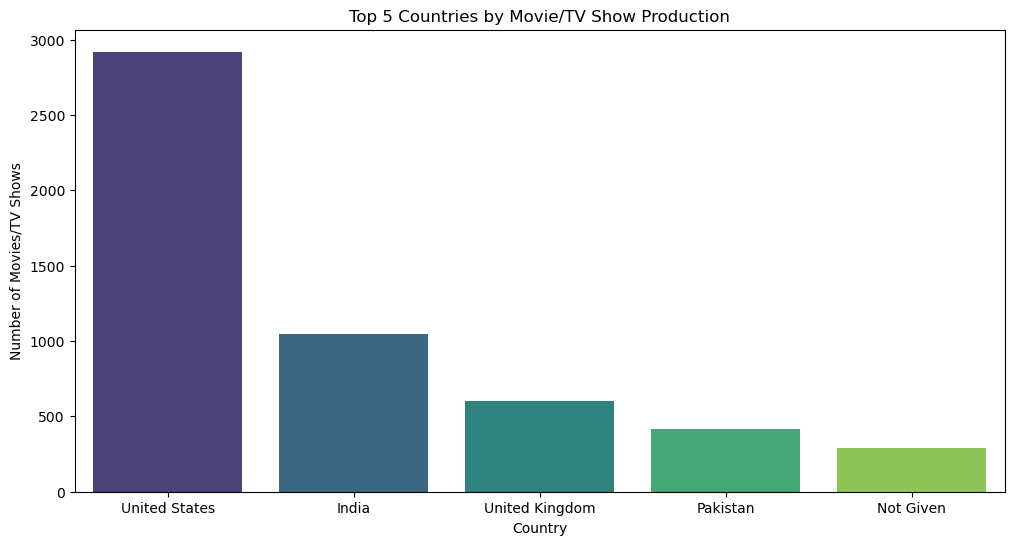

In [104]:
# Plot the top 5 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')
plt.title('Top 5 Countries by Movie/TV Show Production')
plt.xlabel('Country')
plt.ylabel('Number of Movies/TV Shows')
plt.show()

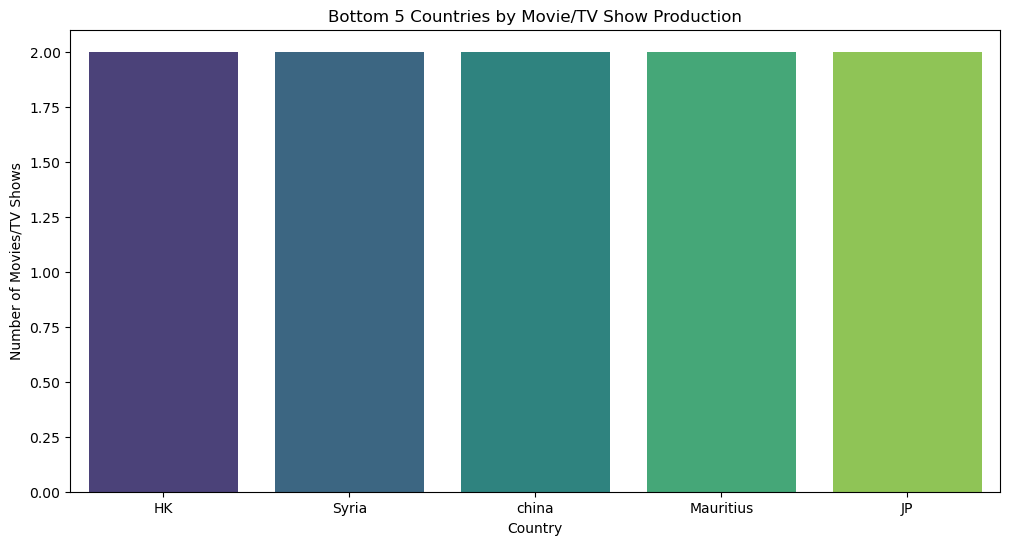

In [103]:
# Plot the bottom 5 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_5_countries.index, y=bottom_5_countries.values, palette='viridis')
plt.title('Bottom 5 Countries by Movie/TV Show Production')
plt.xlabel('Country')
plt.ylabel('Number of Movies/TV Shows')
plt.show()

### 2. Movie Trends Over the Years
Visualize the number of movies produced each year.

In [65]:
# Counting the number of movies/TV shows added each year
year_counts = data['year_added'].value_counts().sort_index()

C:\Users\name\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\name\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


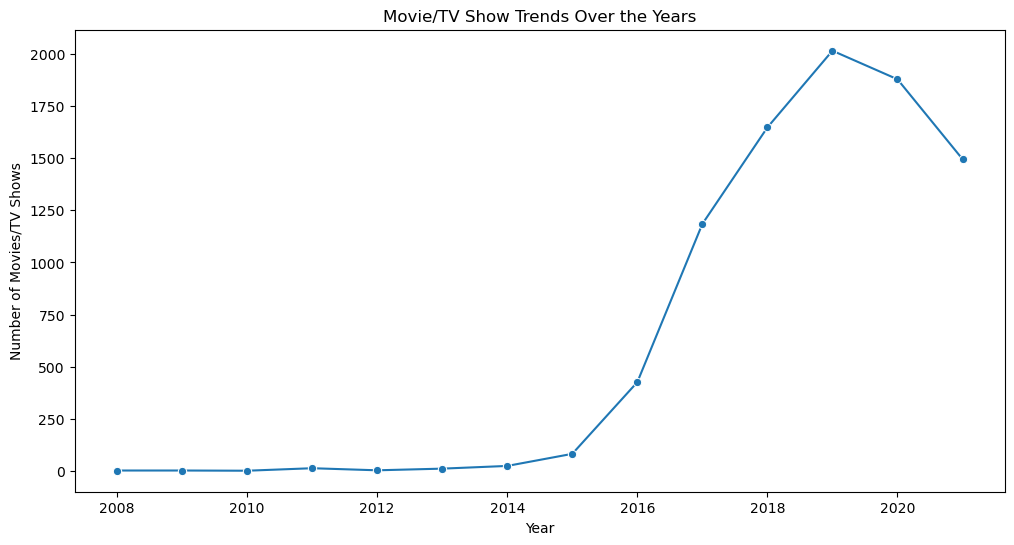

In [66]:
# Plot the movie trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Movie/TV Show Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies/TV Shows')
plt.show()

### 3. Popular Country-Genre Mix
Identify the most popular combinations of country and genre.


In [72]:
# Explode the genres
data_genres = data.explode('listed_in')

In [73]:
# Count the occurrences of each country-genre combination
country_genre_counts = data_genres.groupby(['country', 'listed_in']).size().reset_index(name='count')

In [74]:
# Get the top 10 most common country-genre combinations
top_country_genre = country_genre_counts.nlargest(10, 'count')

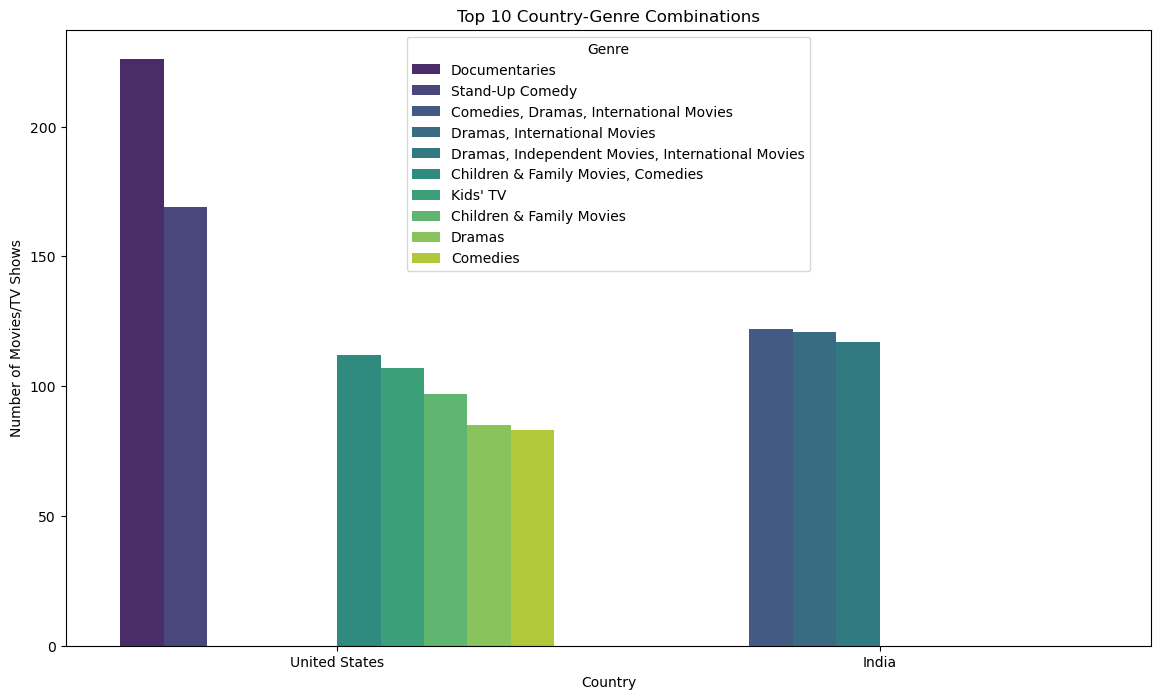

In [76]:
# Plot the most popular country-genre combinations
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='count', hue='listed_in', data=top_country_genre, palette='viridis')
plt.title('Top 10 Country-Genre Combinations')
plt.xlabel('Country')
plt.ylabel('Number of Movies/TV Shows')
plt.legend(title='Genre')
plt.show()

### 4. Countries with Highest Average Movie Duration
Determine which countries produce the longest movies on average

In [77]:
# Ensure the 'movie_duration' column is numeric
data['movie_duration'] = pd.to_numeric(data['movie_duration'], errors='coerce')


In [78]:
# Calculate the average movie duration per country
avg_duration_country = (
    data.groupby('country')['movie_duration']
    .mean()
    .dropna()
    .sort_values(ascending=False)
    .head(10)
)

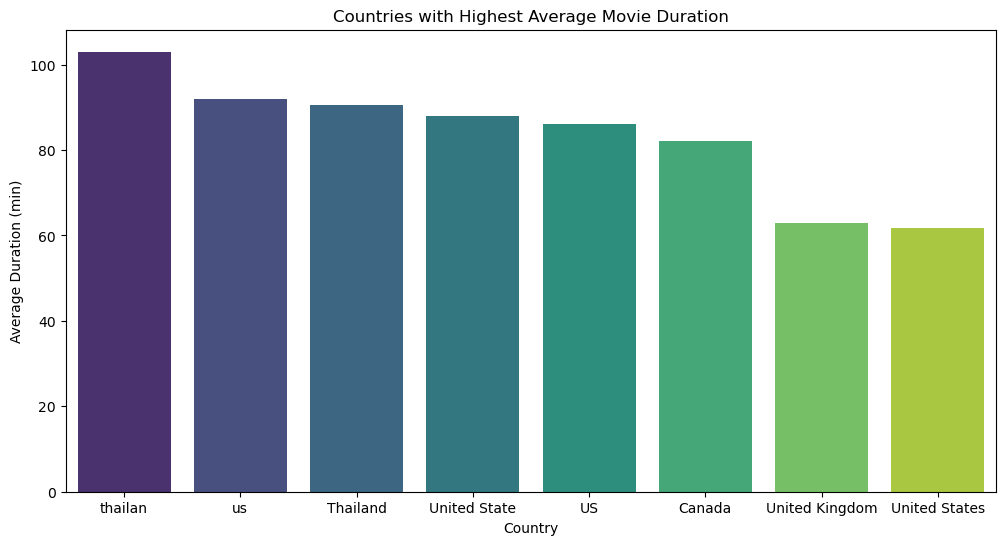

In [80]:
# Plot the countries with the highest average movie duration
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_country.index, y=avg_duration_country.values, palette='viridis')
plt.title('Countries with Highest Average Movie Duration')
plt.xlabel('Country')
plt.ylabel('Average Duration (min)')
plt.show()

### Functions to separate TV series duration from movie duration

In [81]:
# Function to separate TV series duration from movie duration
def separate_duration(row):
    if pd.isna(row['duration']):
        return pd.Series([np.nan, np.nan])
    if 'Season' in row['duration']:
        return pd.Series([row['duration'], np.nan])
    else:
        return pd.Series([np.nan, row['duration']])


In [82]:
# Applying the function to create new columns
data[['tv_series_duration', 'movie_duration']] = data.apply(separate_duration, axis=1)

In [106]:
# Cleaning and converting 'movie_duration' to float safely
data['movie_duration'] = data['movie_duration'].str.replace(' min', '', regex=False)
data['movie_duration'] = pd.to_numeric(data['movie_duration'], errors='coerce')

### Function to create random ratings for each movie

In [84]:
# Function to create random ratings for each movie
def random_rating():
    return round(np.random.uniform(1, 5), 2)

data['random_rating'] = data.apply(lambda x: random_rating(), axis=1)

### Genre Analysis: Split the listed_in column and analyze the most popular genre using Counter.

In [85]:
from collections import Counter

In [86]:
# Flatten the list of genres
all_genres = [genre for sublist in data['listed_in'].dropna() for genre in sublist]

In [87]:
# Count the occurrences of each genre
genre_counts = Counter(all_genres)

In [88]:
# Get the most common genres
most_common_genres = genre_counts.most_common(10)

In [89]:
# Convert to DataFrame for plotting
genre_data = pd.DataFrame(most_common_genres, columns=['genre', 'count'])

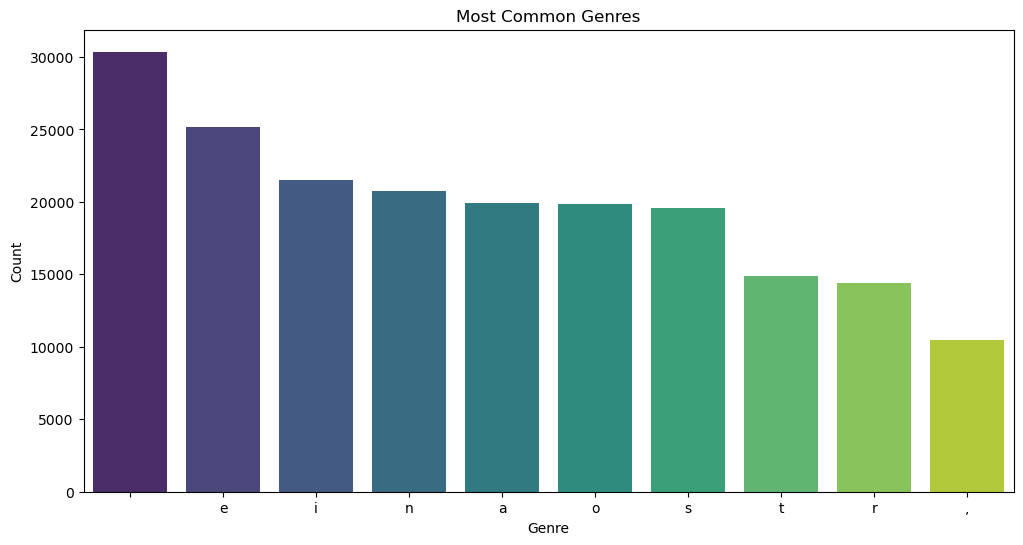

In [91]:
# Plot the most common genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='count', data=genre_data, palette='viridis')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()